In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=data=pd.read_csv('Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
from sklearn import preprocessing
norm=preprocessing.Normalizer()
x=norm.fit_transform(data)
x= pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


133.66289580141037
58.2127721985137
45.937241823589005
36.92683549182813
30.634771581762422
26.951845829300964
24.223045640985834


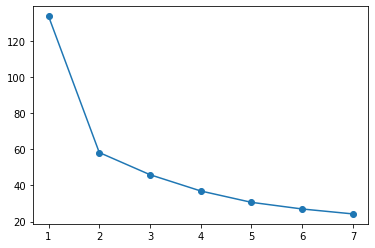

In [7]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,8):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(x)
    wcss.append(km.inertia_)
    print(km.inertia_)
plt.plot(range(1,8),wcss,'o-')

In [8]:
km=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_out=km.fit_predict(x)

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

For n_clusters = 2 The average silhouette_score is : 0.5002245229760047
For n_clusters = 3 The average silhouette_score is : 0.4478257540380591
For n_clusters = 4 The average silhouette_score is : 0.3916603082929343
For n_clusters = 5 The average silhouette_score is : 0.3751662259025521
For n_clusters = 6 The average silhouette_score is : 0.36552543309244806


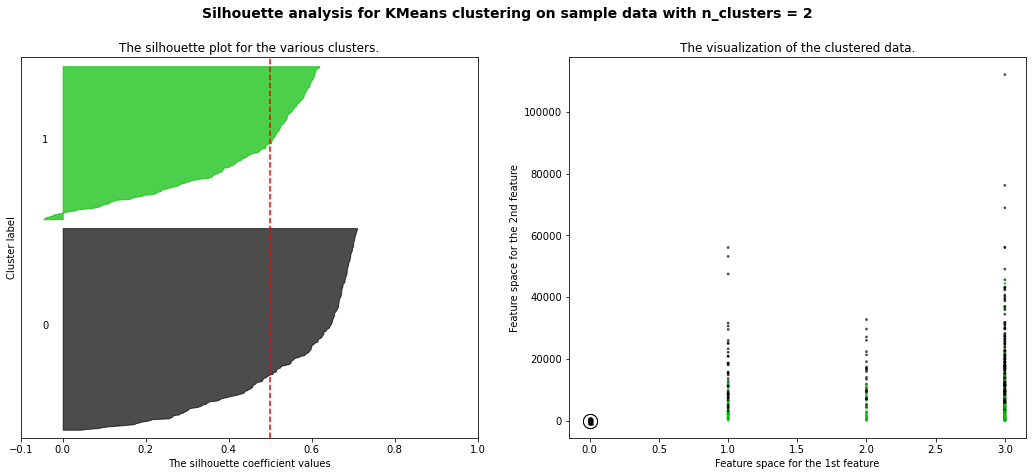

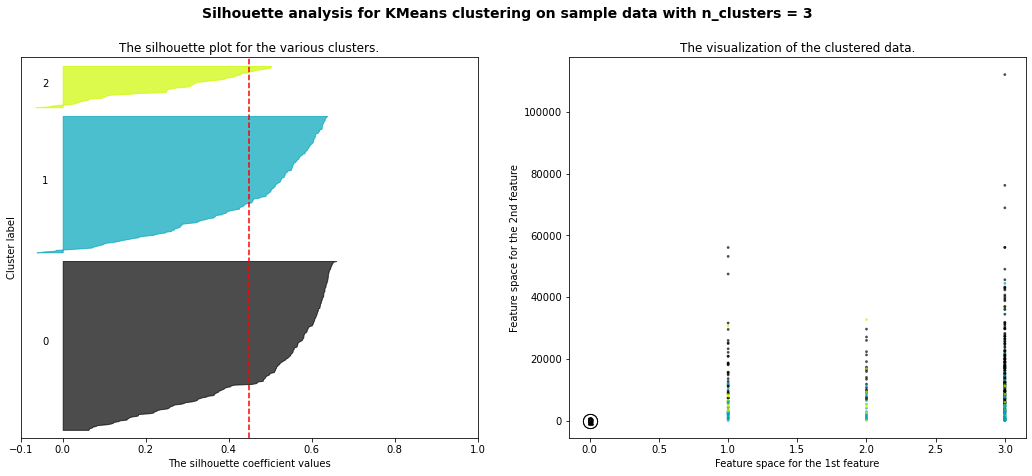

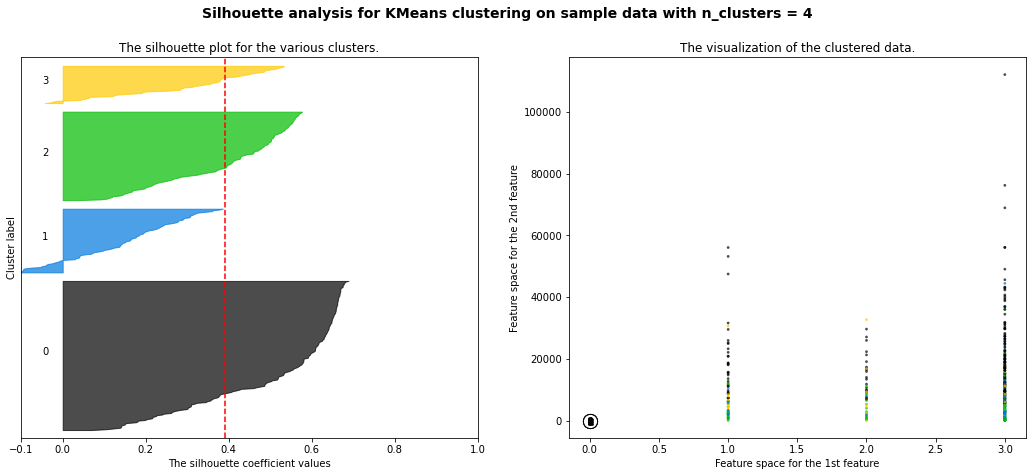

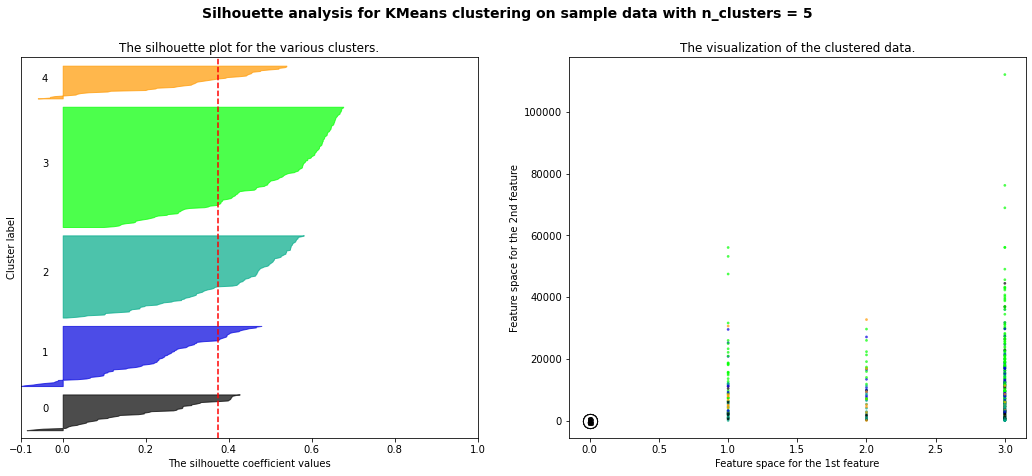

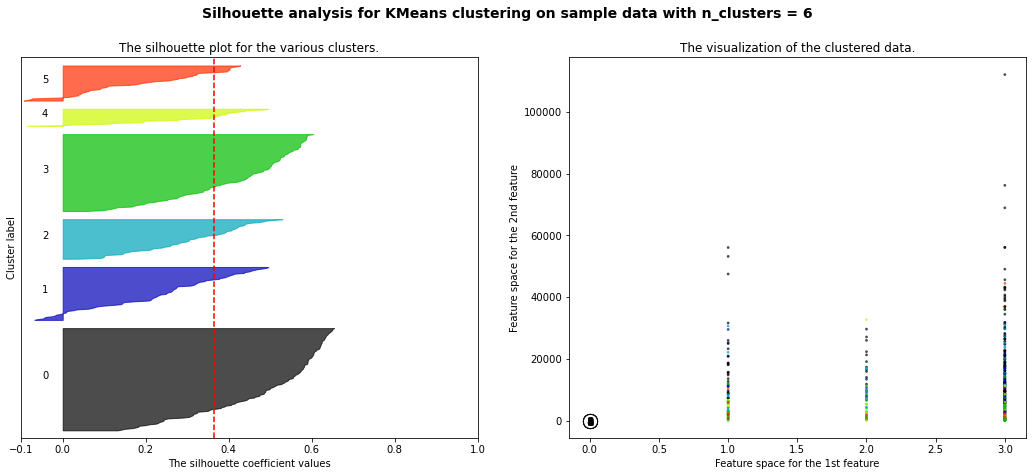

In [12]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data.iloc[:,1].values, data.iloc[:,2].values, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

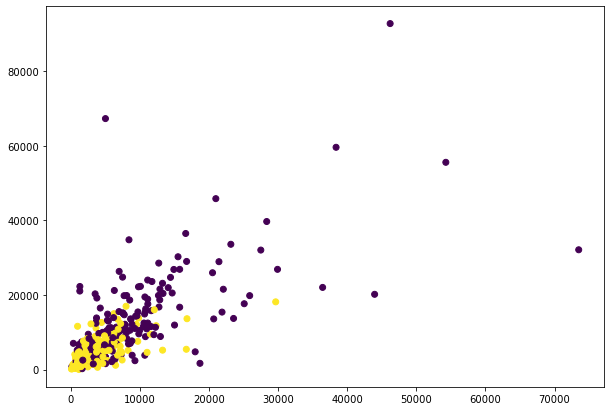

In [13]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['Milk'], data['Grocery'], c=y_out)

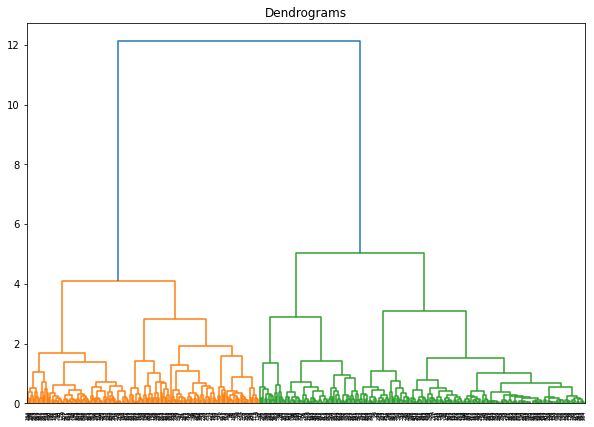

In [14]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))

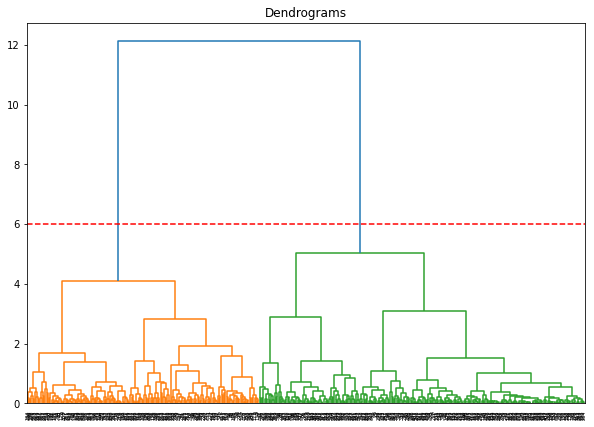

In [15]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [16]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_pred=cluster.fit_predict(x)

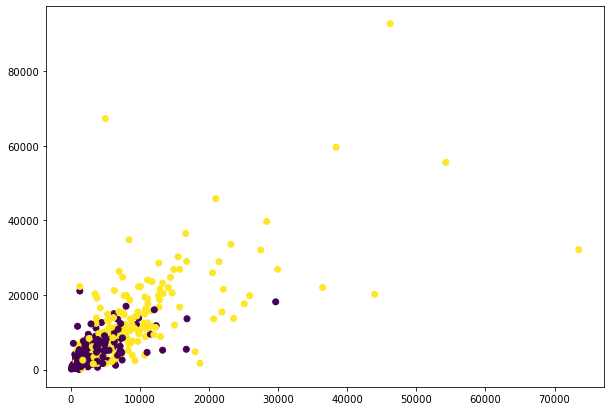

In [17]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['Milk'], data['Grocery'], c=y_pred) 

In [18]:
from sklearn.decomposition import PCA
pca=PCA(.95)
pca.fit(x)
x_pca=pca.transform(x)

In [19]:
x_pca.shape

(440, 4)

In [20]:
x_pca=pd.DataFrame(x_pca)

In [21]:
x_pca

,0,1,2,3
0,0.034037,-0.180421,0.229754,-0.013550
1,0.351057,-0.046644,0.180286,-0.042870
2,0.305375,0.055551,0.221512,-0.124731
3,-0.383677,0.161789,-0.137268,-0.063972
4,-0.318591,-0.076970,0.031286,-0.084618
...,...,...,...,...
435,-0.166266,0.106042,0.010358,-0.125688
436,-0.607490,-0.097158,-0.008438,0.083288
437,0.464837,-0.191884,-0.108976,0.031410
438,-0.412001,-0.120676,0.059065,-0.069533


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


127.98625324859054
52.54471227402417
40.30878530644781
31.419634367826845
25.661241874731374
22.2086563200064
19.73140616374734


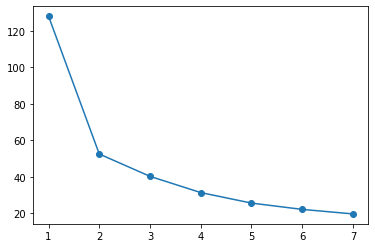

In [22]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,8):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(x_pca)
    wcss.append(km.inertia_)
    print(km.inertia_)
plt.plot(range(1,8),wcss,'o-')

In [23]:
km=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_out1=km.fit_predict(x_pca)

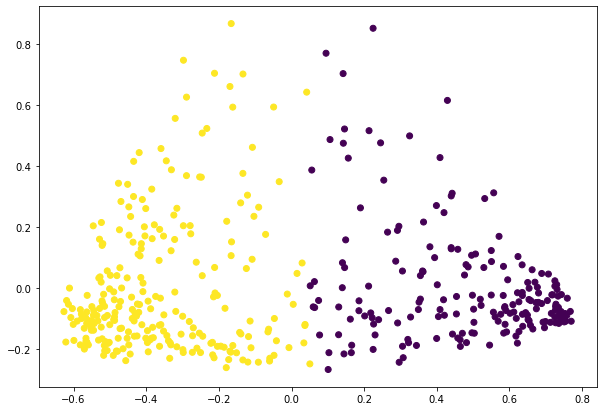

In [24]:
plt.figure(figsize=(10, 7))  
plt.scatter(x_pca[0], x_pca[1], c=y_out1)

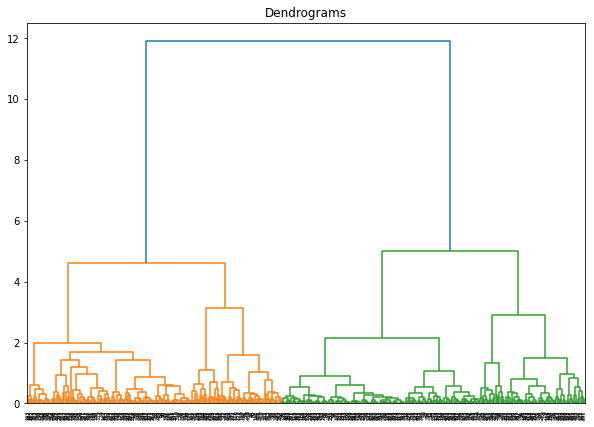

In [25]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_pred1=cluster.fit_predict(x_pca)

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(x_pca[0], x_pca[1], c=y_pred1)